# 1.0 Introduction

The objective of this study is to investigate and validate the different personal, social, and economic factors that influence students performance. The analysis was conducted using fictional data on students performance in mathematics, reading, and writing available on the [kaggle](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics)

O dataset tem as seguintes colunas:
- **Gender**: The gender of the student (male/female)
- **Race/ethnicity**: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)
- **Parental level of education**: The highest level of education attained by the student's parent(s) or guardian(s)
- **Lunch**: Whether the student receives free or reduced-price lunch (yes/no)
- **Test preparation cours**e: Whether the student completed a test preparation course (yes/no)
- **Math score**: The student's score on a standardized mathematics test
- **Reading score**: The student's score on a standardized reading test
- **Writing score**: The student's score on a standardized writing test

The following questions will be addressed during the analysis:

- **Is there a difference in scores between students who completed a test preparation course and those who did not?**
- **What is the distribution of scores among different parental education levels?**
- **Is there a correlation between reading scores and writing scores of the students?**
- **Do students who receive free or reduced-price lunch have significantly different scores compared to those who do not?**
- **Is there a relationship between students' race or ethnicity and their scores?**
- **What is the proportion of students who completed a test preparation course in relation to gender?**
- **Is there a difference in scores between male and female students?**

## 1.1 Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

In [2]:
df = pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## 1.2 Checking Initial Statistics and Null Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


In [5]:
# The dataset does not have any null values.
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 2.0 Univariate analysis

## 2.1 Counting each of the variables

In [6]:
gender_counts = df['gender'].value_counts()
race_ethnicity_counts = df['race/ethnicity'].value_counts()
parental_education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
test_preparation_counts = df['test preparation course'].value_counts()


print(gender_counts)
print('----------------------------------------------------------')
print(race_ethnicity_counts)
print('----------------------------------------------------------')
print(parental_education_counts)
print('----------------------------------------------------------')
print(lunch_counts)
print('----------------------------------------------------------')
print(test_preparation_counts)

male      508
female    492
Name: gender, dtype: int64
----------------------------------------------------------
group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64
----------------------------------------------------------
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64
----------------------------------------------------------
standard        660
free/reduced    340
Name: lunch, dtype: int64
----------------------------------------------------------
none         656
completed    344
Name: test preparation course, dtype: int64


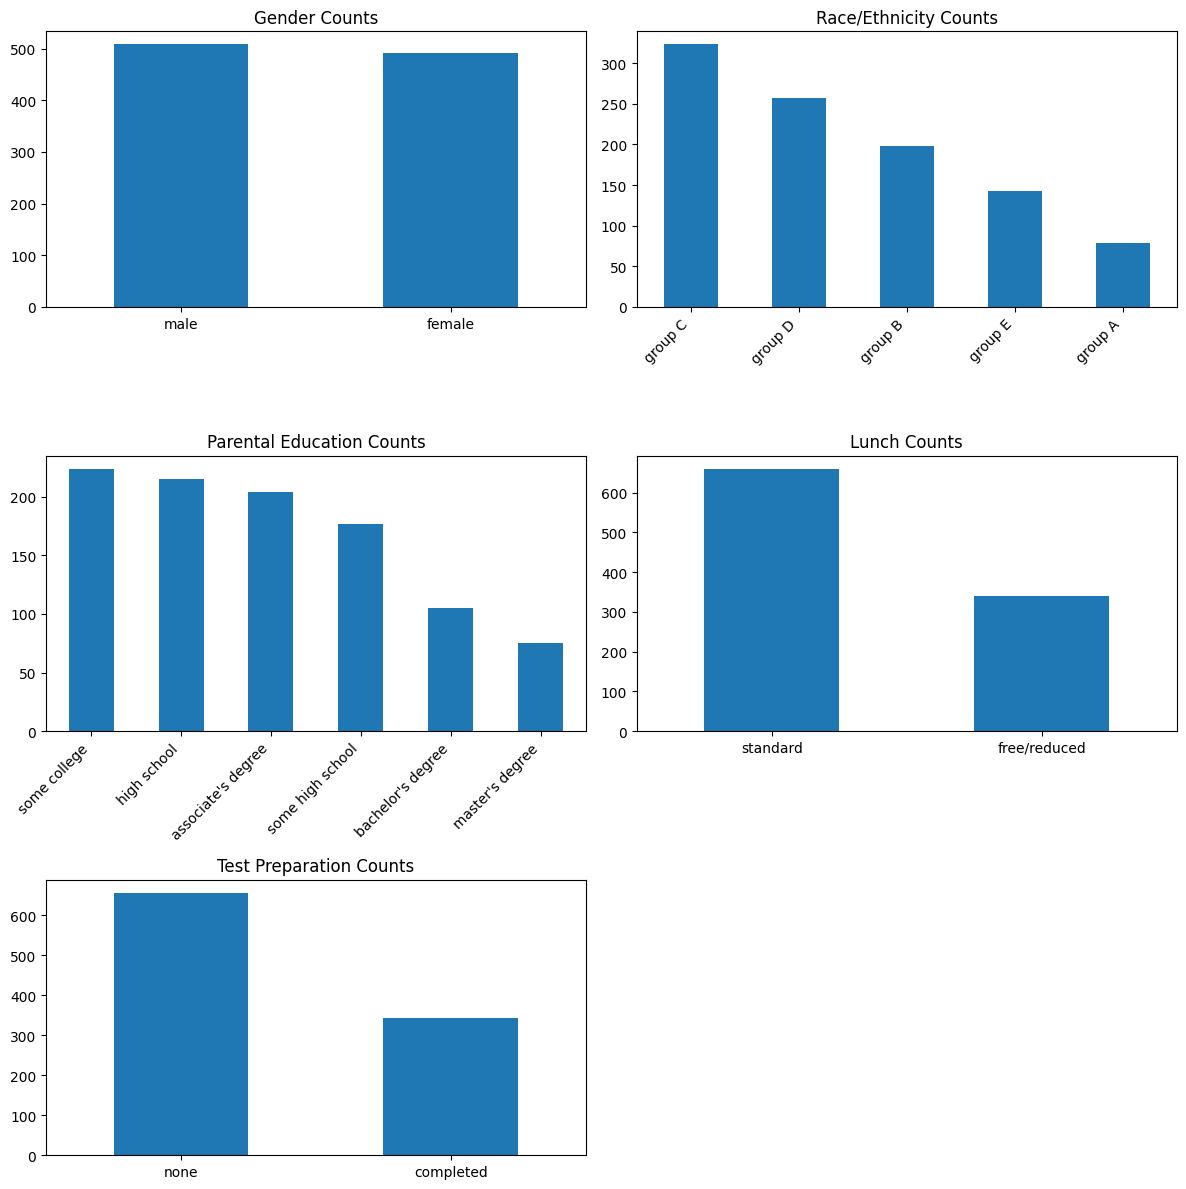

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

gender_counts.plot(kind='bar', ax=axes[0, 0], title='Gender Counts')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

race_ethnicity_counts.plot(kind='bar', ax=axes[0, 1], title='Race/Ethnicity Counts')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

parental_education_counts.plot(kind='bar', ax=axes[1, 0], title='Parental Education Counts')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

lunch_counts.plot(kind='bar', ax=axes[1, 1], title='Lunch Counts')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0,)

test_preparation_counts.plot(kind='bar', ax=axes[2, 0], title='Test Preparation Counts')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=0)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## 2.2 Plotting the distribution of each score

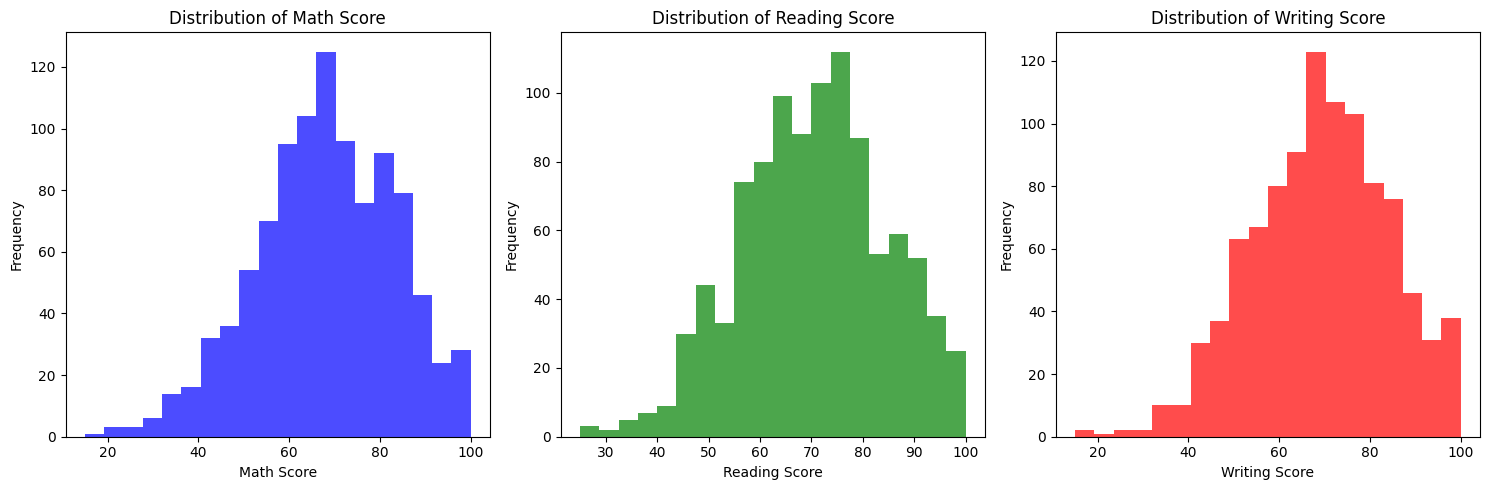

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['math score'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Math Score')
axes[0].set_xlabel('Math Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['reading score'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribution of Reading Score')
axes[1].set_xlabel('Reading Score')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['writing score'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Distribution of Writing Score')
axes[2].set_xlabel('Writing Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3.0 Bivariate analysis

## 3.1 Score x Gender

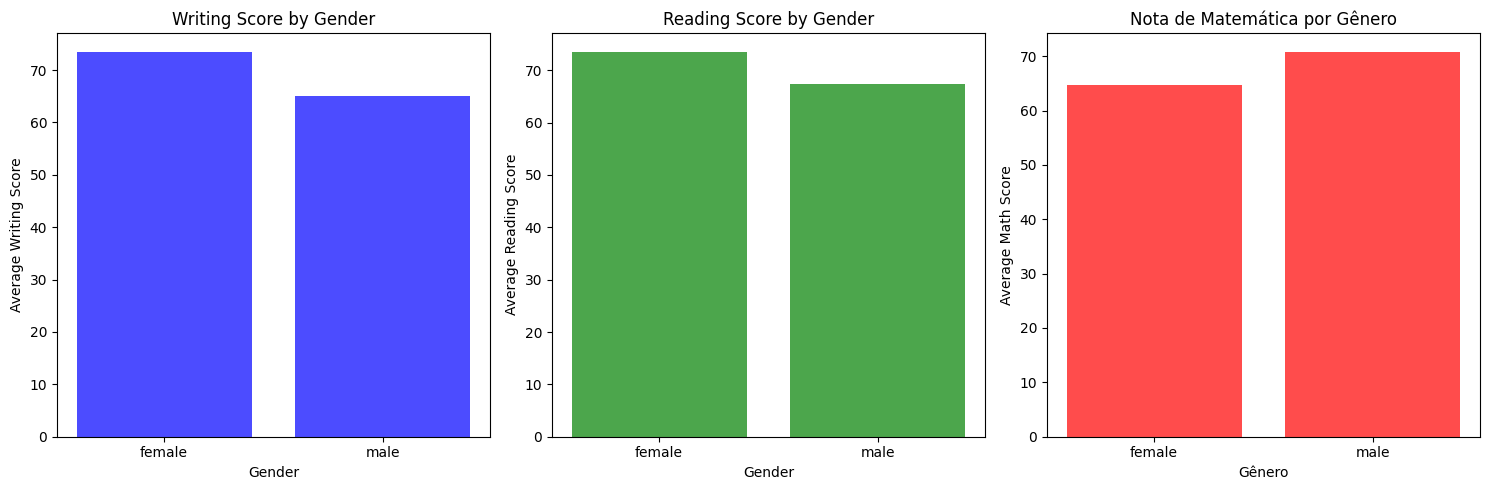

In [9]:
writing_score_by_gender = df.groupby('gender')['writing score'].mean()
reading_score_by_gender = df.groupby('gender')['reading score'].mean()
math_score_by_gender = df.groupby('gender')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].bar(writing_score_by_gender.index, writing_score_by_gender.values, color='blue', alpha=0.7)
axes[0].set_title('Writing Score by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Writing Score')


axes[1].bar(reading_score_by_gender.index, reading_score_by_gender.values, color='green', alpha=0.7)
axes[1].set_title('Reading Score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Reading Score')

axes[2].bar(math_score_by_gender.index, math_score_by_gender.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Matemática por Gênero')
axes[2].set_xlabel('Gênero')
axes[2].set_ylabel('Average Math Score')

plt.tight_layout()
plt.show()

## 3.2 Score X Teste Preparation

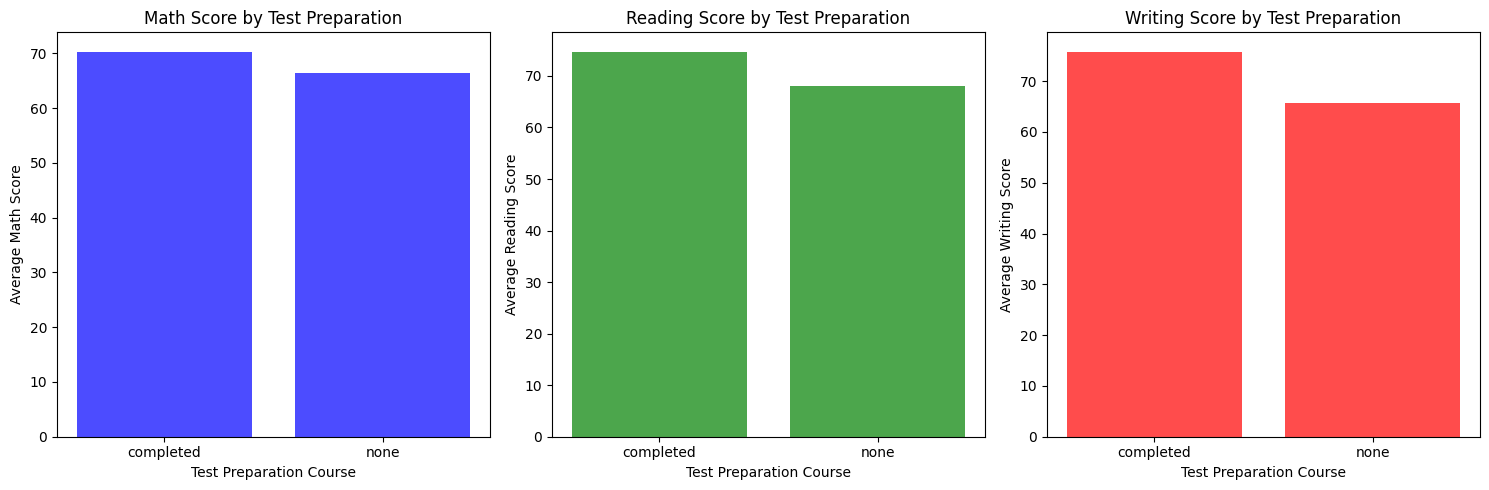

In [10]:
writing_score_by_TestPreparation = df.groupby('test preparation course')['writing score'].mean()
reading_score_by_TestPreparation = df.groupby('test preparation course')['reading score'].mean()
math_score_by_TestPreparation = df.groupby('test preparation course')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(math_score_by_TestPreparation.index, math_score_by_TestPreparation.values, color='blue', alpha=0.7)
axes[0].set_title('Math Score by Test Preparation')
axes[0].set_xlabel('Test Preparation Course')
axes[0].set_ylabel('Average Math Score')

axes[1].bar(reading_score_by_TestPreparation.index, reading_score_by_TestPreparation.values, color='green', alpha=0.7)
axes[1].set_title('Reading Score by Test Preparation')
axes[1].set_xlabel('Test Preparation Course')
axes[1].set_ylabel('Average Reading Score')

axes[2].bar(writing_score_by_TestPreparation.index, writing_score_by_TestPreparation.values, color='red', alpha=0.7)
axes[2].set_title('Writing Score by Test Preparation')
axes[2].set_xlabel('Test Preparation Course')
axes[2].set_ylabel('Average Writing Score')

plt.tight_layout()
plt.show()

## 3.3 Score X Ethnicity

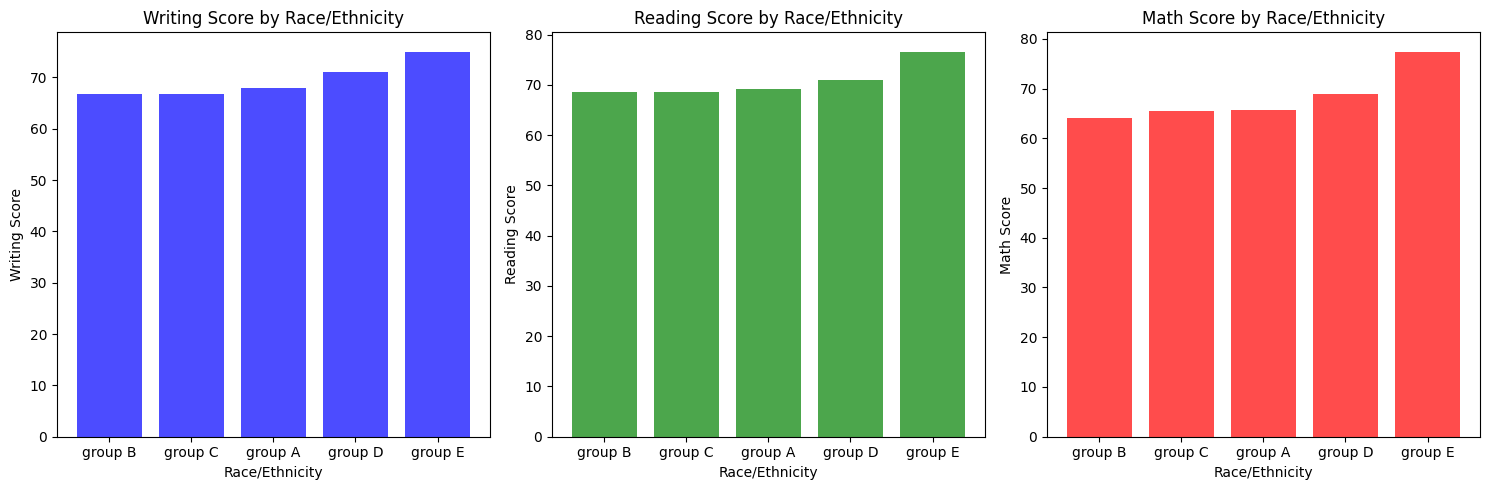

In [11]:
writing_score_by_raceEthnicity = df.groupby('race/ethnicity')['writing score'].mean().sort_values(ascending=True)
reading_score_by_raceEthnicity = df.groupby('race/ethnicity')['reading score'].mean().sort_values(ascending=True)
math_score_by_raceEthnicity = df.groupby('race/ethnicity')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_raceEthnicity.index, writing_score_by_raceEthnicity.values, color='blue', alpha=0.7)
axes[0].set_title('Writing Score by Race/Ethnicity')
axes[0].set_xlabel('Race/Ethnicity')
axes[0].set_ylabel('Writing Score')

axes[1].bar(reading_score_by_raceEthnicity.index, reading_score_by_raceEthnicity.values, color='green', alpha=0.7)
axes[1].set_title('Reading Score by Race/Ethnicity')
axes[1].set_xlabel('Race/Ethnicity')
axes[1].set_ylabel('Reading Score')

axes[2].bar(math_score_by_raceEthnicity.index, math_score_by_raceEthnicity.values, color='red', alpha=0.7)
axes[2].set_title('Math Score by Race/Ethnicity')
axes[2].set_xlabel('Race/Ethnicity')
axes[2].set_ylabel('Math Score')

plt.tight_layout()
plt.show()

## 3.4  Score X Parental Level of Education

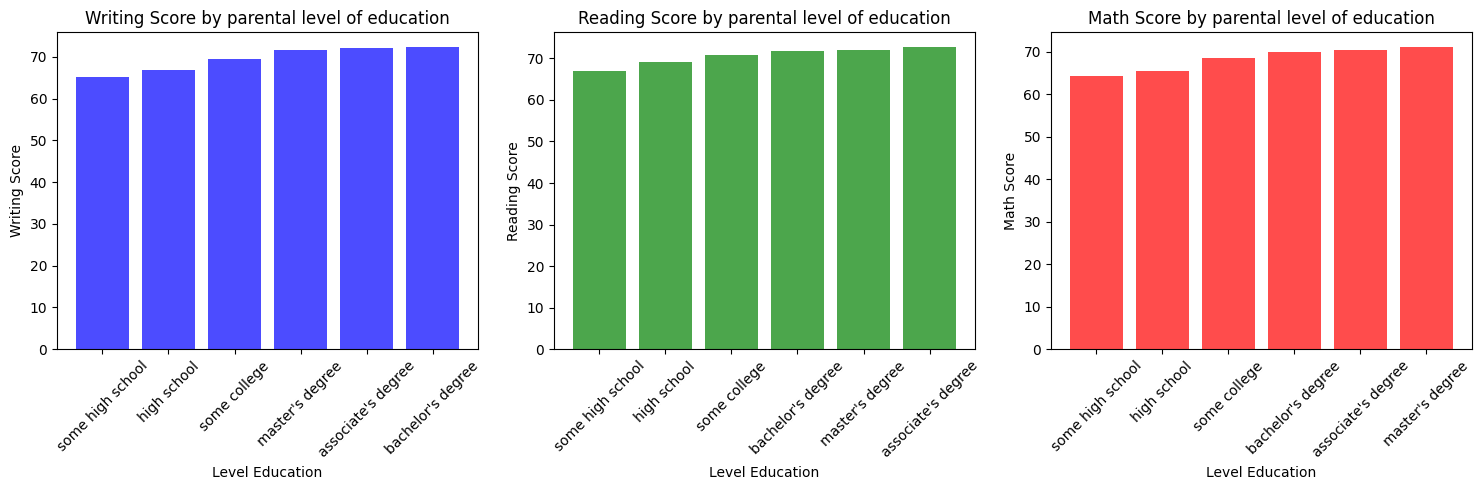

In [12]:
writing_score_by_parentalLVL = df.groupby('parental level of education')['writing score'].mean().sort_values()
reading_score_by_parentalLVL = df.groupby('parental level of education')['reading score'].mean().sort_values()
math_score_by_parentalLVL = df.groupby('parental level of education')['math score'].mean().sort_values()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_parentalLVL.index, writing_score_by_parentalLVL.values, color='blue', alpha=0.7)
axes[0].set_title('Writing Score by parental level of education')
axes[0].set_xlabel('Level Education')
axes[0].set_ylabel('Writing Score')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(reading_score_by_parentalLVL.index, reading_score_by_parentalLVL.values, color='green', alpha=0.7)
axes[1].set_title('Reading Score by parental level of education')
axes[1].set_xlabel('Level Education')
axes[1].set_ylabel('Reading Score')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(math_score_by_parentalLVL.index, math_score_by_parentalLVL.values, color='red', alpha=0.7)
axes[2].set_title('Math Score by parental level of education')
axes[2].set_xlabel('Level Education')
axes[2].set_ylabel('Math Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.5 Score X Lunch 

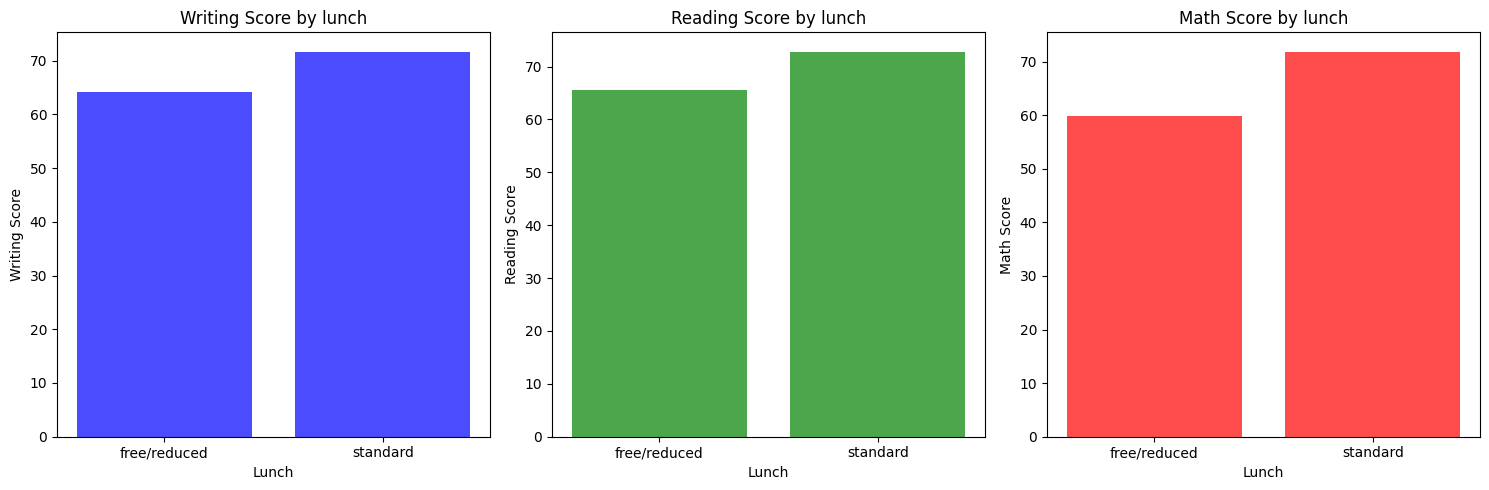

In [13]:
writing_score_by_lunch = df.groupby('lunch')['writing score'].mean()
reading_score_by_lunch = df.groupby('lunch')['reading score'].mean()
math_score_by_lunch = df.groupby('lunch')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_lunch.index, writing_score_by_lunch.values, color='blue', alpha=0.7)
axes[0].set_title('Writing Score by lunch')
axes[0].set_xlabel('Lunch')
axes[0].set_ylabel('Writing Score')

axes[1].bar(reading_score_by_lunch.index, reading_score_by_lunch.values, color='green', alpha=0.7)
axes[1].set_title('Reading Score by lunch')
axes[1].set_xlabel('Lunch')
axes[1].set_ylabel('Reading Score')

axes[2].bar(math_score_by_lunch.index, math_score_by_lunch.values, color='red', alpha=0.7)
axes[2].set_title('Math Score by lunch')
axes[2].set_xlabel('Lunch')
axes[2].set_ylabel('Math Score')

plt.tight_layout()
plt.show()

## 3.6 Ethnicity x Lunch

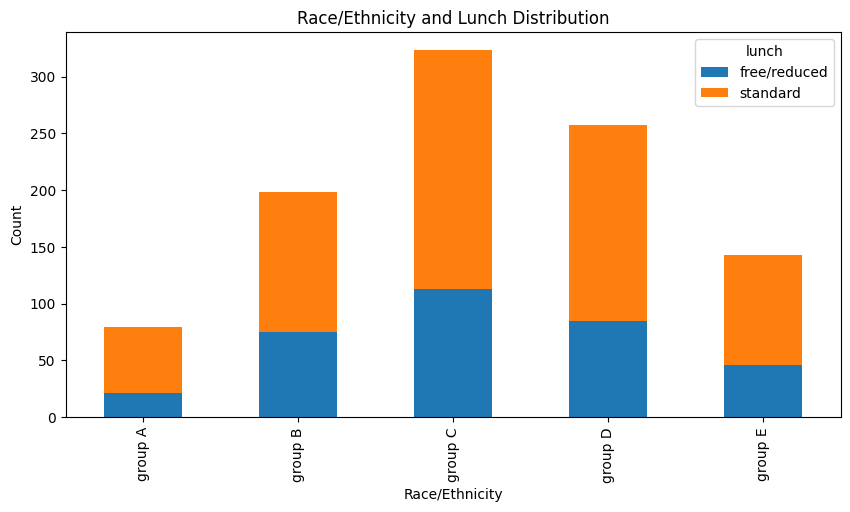

In [14]:
grouped_race_lunch = df.groupby(['race/ethnicity', 'lunch']).size().unstack()

grouped_race_lunch.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Race/Ethnicity and Lunch Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

## 3.7 Ethnicity X Parental Level of Education

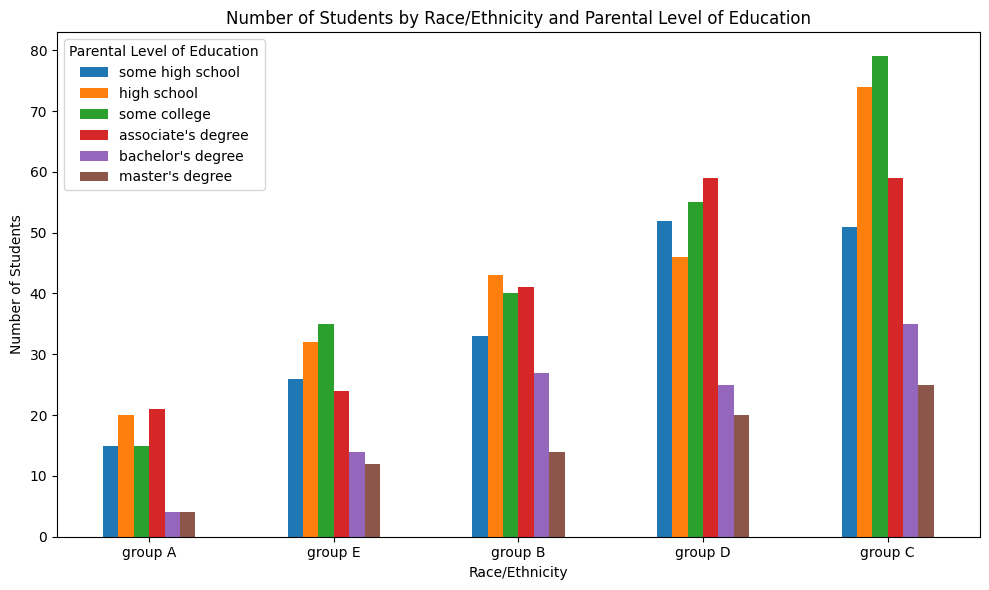

In [15]:
# Create a dictionary to map parental level of education to numerical values
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

df['numerical_education'] = df['parental level of education'].map(education_mapping)

# Group and pivot the data
pivot_grouped_data = df.groupby(['race/ethnicity', 'numerical_education']).size().reset_index(name='count').pivot(index='race/ethnicity', columns='numerical_education', values='count')


pivot_grouped_data['total'] = pivot_grouped_data.sum(axis=1)
pivot_grouped_data = pivot_grouped_data.sort_values(by='total', ascending=True).drop(columns='total')

# Sort the columns in ascending order
pivot_grouped_data = pivot_grouped_data.sort_index(axis=1)


pivot_grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Students by Race/Ethnicity and Parental Level of Education')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Parental Level of Education', labels=sorted(education_mapping, key=education_mapping.get))

plt.tight_layout()
plt.show()

## 3.7 Gender x Parental Level of Education

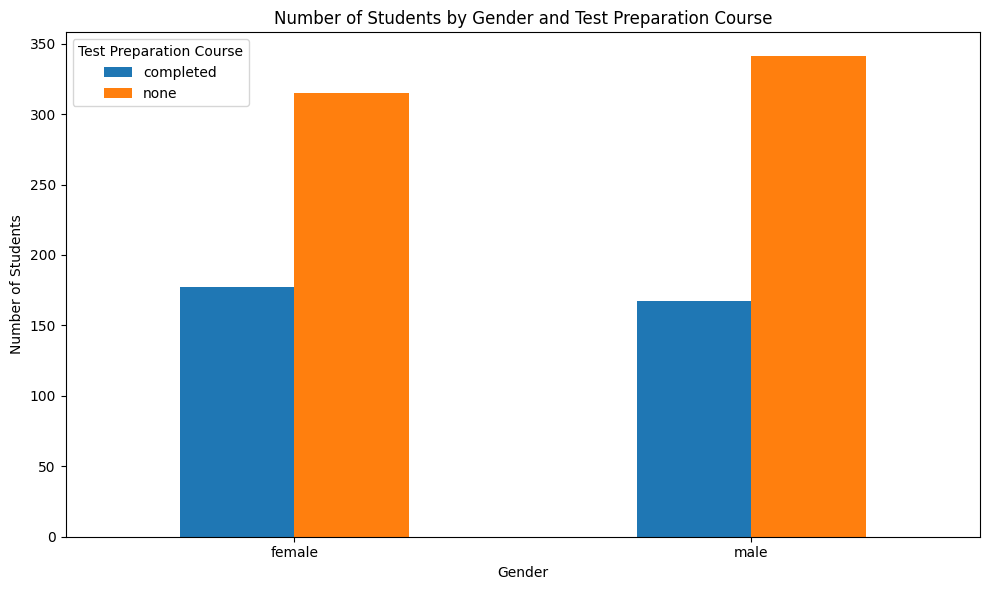

In [16]:
grouped_gender_prep_course = df.groupby(['gender', 'test preparation course']).size().reset_index(name='count').sort_values(by='count', ascending=True)

ax = grouped_gender_prep_course.pivot(index='gender', columns='test preparation course', values='count').plot(kind='bar', figsize=(10, 6))
plt.title('Number of Students by Gender and Test Preparation Course')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Test Preparation Course')

plt.tight_layout()
plt.show()

# 4.0 Multivariate Analysis

## 4.1 Correlation Matrix

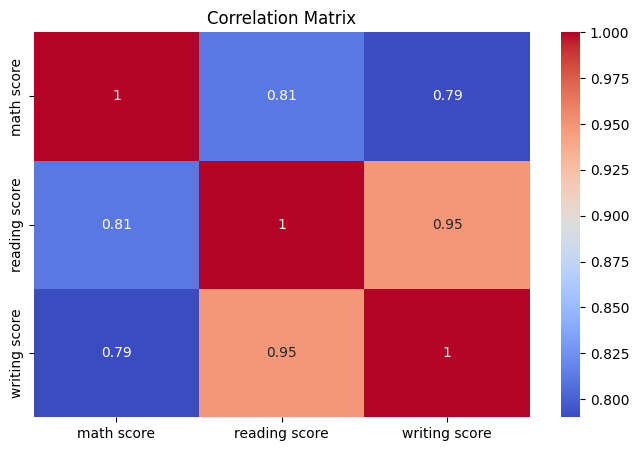

In [18]:
correlation_matrix = df.drop(columns='numerical_education').corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4.2 Parental Level of Education & Gender x Writing Score

In [33]:
writing_score_by_parental_edu_gender = df.groupby(['parental level of education', 'gender'])['writing score','reading score','math score'].mean()
writing_score_by_parental_edu_gender

writing_score_by_parental_edu_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Scores by Parental Level of Education and Gender')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Writing Score')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5.0 Analysis Results

Based on the analyses conducted on the dataset, we have reached the following conclusions in response to each of the questions posed at the beginning of the notebook:

### 5.1 Is there a difference in scores between students who completed a test preparation course and those who did not?

R: There is a significant improvement in the average grades of students who completed the test preparation course compared to those who did not. An increase of 5.79%, 9.92%, and 15.47% was observed in math, reading, and writing scores, respectively. These results highlight the positive influence of the test preparation course on students' scores in all evaluated areas.

### 5.2 What is the distribution of scores among different parental education levels?

R:  It is observed that students whose parents have a higher level of education, such as "associate's degree," "bachelor's degree," and "master's degree," have higher scores in writing, reading, and math compared to those whose parents have a lower level of education, such as "some high school" and "high school." The difference in scores is more pronounced in math, where the average of students with parents holding an "associate's degree" is approximately 9.54% higher than those with "some high school." In writing, the difference is approximately 10.65% between the same groups. In reading, the difference is approximately 9.39%.

### 5.3 Is there a correlation between reading scores and writing scores of students?

R: A strong positive correlation of 0.95 was observed between the reading scores and writing scores of the students. However, it is important to note that correlation does not imply causation. In other words, this relationship does not necessarily indicate that a high performance in reading causes a high performance in writing, or vice versa.

### 5.4 Do students who receive free or reduced-price lunch have significantly different scores compared to those who do not receive it?

R: Based on the analysis of scores, it is concluded that students who receive free or reduced-price lunch have significantly lower scores than those who do not receive it. In terms of writing score, students who receive free or reduced-price lunch have a negative difference of approximately 10.37% compared to students who do not receive it. In reading score, the difference is approximately 9.84%, and in math score, the difference is approximately 16.70%.

### 5.5 Is there a relationship between students' racial or ethnic background and their scores?

R: According to the analysis, significant differences in scores were observed among ethnic groups. Students from Group E had the highest average scores in writing (75.03), reading (76.42), and math (77.42). In contrast, students from Group B had the lowest average scores in writing (66.71), reading (68.53), and math (64.07). These results indicate an association between students' racial or ethnic background and their scores in the three evaluated areas.

### 5.6 What is the proportion of students who completed a test preparation course in relation to gender?

R: Based on the analysis of the proportion of students who completed the preparation course by gender, we can conclude that the completion rate is slightly higher among female students compared to male students. Approximately 35.9% of female students completed the course, while approximately 32.8% of male students completed it. These results suggest that, overall, female students have a slightly higher tendency to engage in and complete the preparation course.

### 5.7 Is there a difference in scores between male and female students?

R: There are differences in scores between male and female students in each subject. Female students scored higher in writing and reading, with an advantage of approximately 13.03%. On the other hand, male students scored higher in math, with an advantage of about 9.03%.

## Conclusion

In conclusion, this study has identified several factors that influence students' performance in the areas of math, reading, and writing.

- Participation in a test preparation course has proven to be beneficial, resulting in significant improvements in students' scores.
- Parental level of education also plays an important role, with students whose parents have higher levels of education achieving higher scores.
- Furthermore, a strong positive correlation was observed between students' reading and writing skills.
- The students' socio-economic status, represented by the receipt of free or reduced-price lunch, negatively affected their scores.
- Race or ethnicity also had an impact on students' scores, with significant differences among ethnic groups.
- Female students had slightly higher completion rates in the preparation course and scored higher in writing and reading, while male students scored higher in math.

These findings highlight the importance of considering these factors when developing educational strategies and providing appropriate support to students to enhance their academic performance.


In [25]:
unique_parental_education = df['parental level of education'].unique()
unique_parental_education